## Improve Outlier Detection post Dimensionality Reduction with UFS

Applicazione dell'outlier Detection dopo aver eliminato le features attraverso UFS.

E' stato ripetuto per 3-4-5 metodi (vedi report)

Selezione finale 4 metodi: si ottiene train_reduced_cleaned_4

In [1]:
#!pip install tabulate

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import seaborn as sns
#import scikitplot as skplt
from numpy import percentile
import math

#pandas
from pandas.plotting import parallel_coordinates
from datetime import date, datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler
from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA
#from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

#scikitplot
#from scikitplot.metrics import plot_roc
#from scikitplot.metrics import plot_precision_recall
#from scikitplot.metrics import plot_lift_curve
#from scikitplot.metrics import plot_cumulative_gain

#mlxtend
#from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random

from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

# Data Preparation

In [4]:
X_train_red = pd.read_csv("../data/reduced_files/X_train_reduced_UFS.csv") 
y_train = pd.read_csv("../data/csv_files/y_train.csv") 

X = X_train_red.values
y = y_train.values

df=X_train_red.copy()
df["Activity"]=y_train
df_numeric=df.copy()

## Dataset per model approaches

In [5]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train1, y_train1)

y_pred = clf.predict(X_test1)

print('Accuracy %s' % accuracy_score(y_test1, y_pred))
print('F1-score %s' % f1_score(y_test1, y_pred, average=None))
print(classification_report(y_test1, y_pred))

Accuracy 0.9446962828649139
F1-score [0.94520548 0.93333333 0.92605634 0.92496925 0.92647059 1.        ]
              precision    recall  f1-score   support

           1       0.93      0.96      0.95       361
           2       0.96      0.91      0.93       315
           3       0.91      0.94      0.93       280
           4       0.92      0.93      0.92       406
           5       0.93      0.92      0.93       409
           6       1.00      1.00      1.00       435

    accuracy                           0.94      2206
   macro avg       0.94      0.94      0.94      2206
weighted avg       0.94      0.94      0.94      2206



# Proximity based approaches

## Density based (DBSCAN - LOF)

# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
scl = StandardScaler()
scaled_df = scl.fit_transform(df_numeric)

In [9]:
df_dbscan = pd.DataFrame(scaled_df, columns = df_numeric.columns)

**Parametri iniziali randomici**

**Testo differenti min_samples e eps**

#### Best DBSCAN

In [10]:
scaled_dbscan = pd.DataFrame(scaled_df, columns = df_numeric.columns)

scaled_df = dataset scalato in valori; df_dbscan = scaled_df come dataframe

In [11]:
# Istantiating with eps = 6 and min_samples = 5 (best model) | 25 clusters --> 6789
best_dbscan_model = DBSCAN(eps=2, min_samples=15)

# Fitting
best_dbscan_model.fit(df_dbscan)

# Extracting labels
df_dbscan["LABEL"] = best_dbscan_model.labels_
df_dbscan["LABEL"]

0       0
1       0
2       0
3       0
4       0
       ..
7347   -1
7348   -1
7349   -1
7350   -1
7351   -1
Name: LABEL, Length: 7352, dtype: int64

In [12]:
np.unique(best_dbscan_model.labels_, return_counts=True)

(array([-1,  0,  1], dtype=int64), array([3692, 3599,   61], dtype=int64))

In [13]:
dbscan_indexes = list(df_numeric.index)
dbscan_indexes #indici di tutti i dati

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [14]:
scaled_dbscan_id = df_dbscan.copy()
scaled_dbscan_id

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Activity,LABEL
0,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,...,-0.856486,-0.856208,-1.002717,-0.771140,-0.771140,-0.929977,-0.687219,0.407946,0.777584,0
1,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,...,-0.880846,-0.860360,-1.034416,-0.785153,-0.785153,-1.133978,-0.694138,0.409117,0.777584,0
2,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,-0.892228,-0.889197,0.880323,...,-0.883709,-0.858037,-1.060306,-0.782166,-0.782166,-1.133978,-0.702239,0.410288,0.777584,0
3,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,-0.957097,-0.927662,0.880323,...,-0.884181,-0.845163,-1.034755,-0.782856,-0.782856,-1.063749,-0.701684,0.414650,0.777584,0
4,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,-0.932347,-0.910626,0.895413,...,-0.890211,-0.845745,-1.104198,-0.782392,-0.782392,-1.133978,-0.700152,0.425463,0.777584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,1.188461,1.634933,-0.687823,...,1.075982,1.340493,1.087781,0.356454,0.356454,0.943901,-0.590763,0.605162,-0.941926,-1
7348,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,1.188461,1.787170,-0.663908,...,1.000639,0.916952,1.158191,0.350437,0.350437,0.780778,-0.551598,0.652468,-0.941926,-1
7349,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,0.693203,2.084524,-0.716166,...,1.018682,1.499935,1.099620,0.339208,0.339208,0.703115,-0.565848,0.640597,-0.941926,-1
7350,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,0.554694,2.084524,-0.794074,...,0.830458,0.648261,0.871408,0.243895,0.243895,0.784170,-0.577668,0.631478,-0.941926,-1


In [15]:
scaled_dbscan_id['id'] = dbscan_indexes #inserisco id come colonna nel df
scaled_dbscan_id

,0,1,2,3,4,5,6,7,8,9,...,193,194,195,196,197,198,199,Activity,LABEL,id
0,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,...,-0.856208,-1.002717,-0.771140,-0.771140,-0.929977,-0.687219,0.407946,0.777584,0,0
1,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,...,-0.860360,-1.034416,-0.785153,-0.785153,-1.133978,-0.694138,0.409117,0.777584,0,1
2,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,-0.892228,-0.889197,0.880323,...,-0.858037,-1.060306,-0.782166,-0.782166,-1.133978,-0.702239,0.410288,0.777584,0,2
3,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,-0.957097,-0.927662,0.880323,...,-0.845163,-1.034755,-0.782856,-0.782856,-1.063749,-0.701684,0.414650,0.777584,0,3
4,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,-0.932347,-0.910626,0.895413,...,-0.845745,-1.104198,-0.782392,-0.782392,-1.133978,-0.700152,0.425463,0.777584,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,1.188461,1.634933,-0.687823,...,1.340493,1.087781,0.356454,0.356454,0.943901,-0.590763,0.605162,-0.941926,-1,7347
7348,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,1.188461,1.787170,-0.663908,...,0.916952,1.158191,0.350437,0.350437,0.780778,-0.551598,0.652468,-0.941926,-1,7348
7349,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,0.693203,2.084524,-0.716166,...,1.499935,1.099620,0.339208,0.339208,0.703115,-0.565848,0.640597,-0.941926,-1,7349
7350,0.860922,0.794902,2.086778,0.754697,0.944019,2.235301,1.047375,0.554694,2.084524,-0.794074,...,0.648261,0.871408,0.243895,0.243895,0.784170,-0.577668,0.631478,-0.941926,-1,7350


In [16]:
scaled_dbscan_id = scaled_dbscan_id.set_index('id') #inserisco id
scaled_dbscan_id

,0,1,2,3,4,5,6,7,8,9,...,192,193,194,195,196,197,198,199,Activity,LABEL
id,,,,,,,,,,,,,,,,,,,,,
0,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,-0.925985,-0.637379,0.906009,...,-0.856486,-0.856208,-1.002717,-0.771140,-0.771140,-0.929977,-0.687219,0.407946,0.777584,0
1,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,-0.892228,-0.889197,0.895998,...,-0.880846,-0.860360,-1.034416,-0.785153,-0.785153,-1.133978,-0.694138,0.409117,0.777584,0
2,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,-0.892228,-0.889197,0.880323,...,-0.883709,-0.858037,-1.060306,-0.782166,-0.782166,-1.133978,-0.702239,0.410288,0.777584,0
3,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,-0.957097,-0.927662,0.880323,...,-0.884181,-0.845163,-1.034755,-0.782856,-0.782856,-1.063749,-0.701684,0.414650,0.777584,0
4,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,-0.932347,-0.910626,0.895413,...,-0.890211,-0.845745,-1.104198,-0.782392,-0.782392,-1.133978,-0.700152,0.425463,0.777584,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.913859,1.095963,1.628612,0.821169,1.174137,1.609686,1.247727,1.188461,1.634933,-0.687823,...,1.075982,1.340493,1.087781,0.356454,0.356454,0.943901,-0.590763,0.605162,-0.941926,-1
7348,0.824887,1.026150,1.586100,0.726245,1.023755,1.658407,1.076279,1.188461,1.787170,-0.663908,...,1.000639,0.916952,1.158191,0.350437,0.350437,0.780778,-0.551598,0.652468,-0.941926,-1
7349,0.862975,0.810002,2.100249,0.768781,0.880813,2.266963,0.941403,0.693203,2.084524,-0.716166,...,1.018682,1.499935,1.099620,0.339208,0.339208,0.703115,-0.565848,0.640597,-0.941926,-1


Ottengo variabile con id degli outliers (NO PUNTEGGI)

In [17]:
#retrieve id of outliers ---------------------------
outliers_dbscan = list(df_dbscan[df_dbscan['LABEL'] == -1].index)
outliers_dbscan[:10]

[27, 30, 31, 32, 51, 64, 66, 67, 68, 69]

In [18]:
len(outliers_dbscan)

3692

In [19]:
df.loc[np.where(best_dbscan_model.labels_==-1)]

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
27,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,0.042099,-0.336526,0.716476,...,-0.965328,-0.975070,-0.962917,-0.540489,-0.983317,-0.983317,-0.795886,-0.667085,0.054216,4
30,-0.814708,-0.749418,-0.571899,-0.878682,-0.776895,-0.700710,-0.737152,-0.318402,-0.473334,0.503461,...,-0.407719,-0.604335,-0.760213,0.120497,-0.870864,-0.870864,-0.181838,-0.582806,-0.020756,4
31,-0.758393,-0.586537,-0.439110,-0.774118,-0.555350,-0.438736,-0.737152,-0.212994,-0.473334,0.503461,...,-0.451397,-0.651631,-0.704135,0.202837,-0.872384,-0.872384,-0.187722,-0.552939,-0.053539,4
32,-0.808638,-0.572746,-0.626415,-0.806213,-0.533811,-0.579394,-0.916064,-0.212994,-0.480469,0.566316,...,-0.840629,-0.857226,-0.948829,-0.296367,-0.947618,-0.947618,-0.561142,-0.418368,-0.142549,4
51,-0.914811,-0.895231,-0.891748,-0.917696,-0.924624,-0.905895,-0.785104,-0.410292,-0.800406,0.841586,...,-0.843984,-0.875998,-0.938408,-0.255505,-0.952484,-0.952484,-0.468490,0.432479,-0.553351,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,...,-0.128549,-0.332753,-0.292601,0.577573,-0.681097,-0.681097,0.310836,-0.791883,0.238604,2
7348,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,0.029369,-0.031966,0.282174,...,-0.210320,-0.357992,-0.427577,0.620646,-0.682756,-0.682756,0.207930,-0.771840,0.252676,2
7349,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,-0.110405,0.055411,0.263175,...,-0.193130,-0.351948,-0.241789,0.584816,-0.685851,-0.685851,0.158936,-0.779133,0.249145,2
7350,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,-0.149495,0.055411,0.234850,...,-0.171131,-0.415004,-0.513205,0.445207,-0.712131,-0.712131,0.210070,-0.785181,0.246432,2


## LOF

The anomaly score of each sample is called the Local Outlier Factor. It measures the local deviation of the density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood.

- il numerod di neighbors non rende
- Probabilmente il problema è il dataset conn differenti densità: vedesi risultati DBSCAN e LOF

#### Test

#### Best LOF

In [20]:
# Miglior LOF
clf_LOF = LocalOutlierFactor(n_neighbors=115) 
outliers = clf_LOF.fit_predict(X) # si ottengono tutti i valori (1 se inliers, -1 se outlier)

In [21]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [22]:
list(np.where(outliers ==-1)) #tutti i valori

[array([  27,   30,   33,   66,   67,   69,   70,   71,   72,   73,   75,
          76,   77,  202,  226,  237,  238,  245,  246,  247,  347,  378,
         385,  386,  564,  703,  716, 1062, 1194, 1209, 1210, 1343, 1355,
        1369, 1488, 1513, 1645, 1773, 1789, 1813, 1826, 1925, 1952, 1953,
        1966, 2084, 2412, 2440, 2451, 2570, 2730, 2891, 2907, 2911, 2914,
        2937, 3074, 3113, 3130, 3131, 3132, 3133, 3134, 3136, 3140, 3141,
        3144, 3145, 3146, 3147, 3151, 3152, 3153, 3156, 3157, 3158, 3162,
        3163, 3281, 3297, 3444, 3646, 3759, 3763, 3764, 3785, 3823, 3841,
        3929, 3934, 3935, 3936, 3938, 3939, 4176, 4567, 4597, 4614, 4726,
        4730, 4744, 4941, 5103, 5137, 5138, 5139, 5140, 5141, 5142, 5143,
        5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5271, 5308, 5346,
        5347, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5360, 5364, 5365,
        5368, 5369, 5370, 5513, 5514, 5515, 5534, 5708, 5724, 5903, 6329,
        6333, 6334, 6335, 6336, 6337, 

In [23]:
clf_LOF.negative_outlier_factor_ # si ottiene il LOF score, maggiore il valore più i dati sono inliers

array([-1.24898529, -1.04124322, -0.99154675, ..., -1.03743258,
       -1.03667345, -1.03194227])

In [24]:
np.unique(outliers, return_counts=True)

(array([-1,  1]), array([ 168, 7184], dtype=int64))

**Abbiamo 11 outliers**

In [25]:
np.where(outliers==-1)

(array([  27,   30,   33,   66,   67,   69,   70,   71,   72,   73,   75,
          76,   77,  202,  226,  237,  238,  245,  246,  247,  347,  378,
         385,  386,  564,  703,  716, 1062, 1194, 1209, 1210, 1343, 1355,
        1369, 1488, 1513, 1645, 1773, 1789, 1813, 1826, 1925, 1952, 1953,
        1966, 2084, 2412, 2440, 2451, 2570, 2730, 2891, 2907, 2911, 2914,
        2937, 3074, 3113, 3130, 3131, 3132, 3133, 3134, 3136, 3140, 3141,
        3144, 3145, 3146, 3147, 3151, 3152, 3153, 3156, 3157, 3158, 3162,
        3163, 3281, 3297, 3444, 3646, 3759, 3763, 3764, 3785, 3823, 3841,
        3929, 3934, 3935, 3936, 3938, 3939, 4176, 4567, 4597, 4614, 4726,
        4730, 4744, 4941, 5103, 5137, 5138, 5139, 5140, 5141, 5142, 5143,
        5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5271, 5308, 5346,
        5347, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5360, 5364, 5365,
        5368, 5369, 5370, 5513, 5514, 5515, 5534, 5708, 5724, 5903, 6329,
        6333, 6334, 6335, 6336, 6337, 

In [26]:
clf_LOF.negative_outlier_factor_[np.where(outliers==-1)] # i valori non sono molto negativi

array([-1.79724451, -1.58657409, -1.58583184, -1.7883437 , -1.84456755,
       -1.54923985, -2.68715322, -2.69347371, -1.58650223, -1.7303356 ,
       -1.52401379, -1.5837715 , -1.70069854, -1.52714197, -1.51137708,
       -2.22464587, -1.77811657, -1.59546133, -1.84610116, -1.69176482,
       -1.58450992, -1.59120345, -1.58711088, -1.56916864, -1.50924945,
       -1.50199846, -1.69577468, -1.59637168, -1.5045942 , -2.50164814,
       -1.66280967, -1.53778569, -1.78221193, -1.96867905, -1.51630725,
       -1.73724452, -1.83196049, -1.72428562, -1.71652179, -1.52129574,
       -2.07851449, -1.96577294, -1.53523943, -1.62226257, -1.54035773,
       -1.60497758, -1.85380143, -2.48130649, -2.72549597, -1.93822552,
       -1.53147979, -1.74196349, -1.85467035, -1.50855126, -1.52108262,
       -1.70780476, -1.59562375, -1.51183519, -1.58501241, -1.51253664,
       -1.5821161 , -1.60777812, -1.50022716, -1.54528467, -1.51122137,
       -1.5205856 , -1.53865768, -1.51271255, -1.51955809, -1.52

Si ottengono gli indici e i punteggi degli outliers

In [27]:
## ottenere gli indici degli outliers e i loro punteggi
outlier_indexes = np.where(outliers==-1)[0] #indici
print(len(outlier_indexes))

outlier_scores = clf_LOF.negative_outlier_factor_[outlier_indexes]
print(len(outlier_scores)) #punteggi

168
168


In [28]:
outlier_indexes

array([  27,   30,   33,   66,   67,   69,   70,   71,   72,   73,   75,
         76,   77,  202,  226,  237,  238,  245,  246,  247,  347,  378,
        385,  386,  564,  703,  716, 1062, 1194, 1209, 1210, 1343, 1355,
       1369, 1488, 1513, 1645, 1773, 1789, 1813, 1826, 1925, 1952, 1953,
       1966, 2084, 2412, 2440, 2451, 2570, 2730, 2891, 2907, 2911, 2914,
       2937, 3074, 3113, 3130, 3131, 3132, 3133, 3134, 3136, 3140, 3141,
       3144, 3145, 3146, 3147, 3151, 3152, 3153, 3156, 3157, 3158, 3162,
       3163, 3281, 3297, 3444, 3646, 3759, 3763, 3764, 3785, 3823, 3841,
       3929, 3934, 3935, 3936, 3938, 3939, 4176, 4567, 4597, 4614, 4726,
       4730, 4744, 4941, 5103, 5137, 5138, 5139, 5140, 5141, 5142, 5143,
       5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5271, 5308, 5346,
       5347, 5350, 5351, 5352, 5353, 5354, 5355, 5356, 5360, 5364, 5365,
       5368, 5369, 5370, 5513, 5514, 5515, 5534, 5708, 5724, 5903, 6329,
       6333, 6334, 6335, 6336, 6337, 6338, 6339, 63

In [29]:
outlier_scores

array([-1.79724451, -1.58657409, -1.58583184, -1.7883437 , -1.84456755,
       -1.54923985, -2.68715322, -2.69347371, -1.58650223, -1.7303356 ,
       -1.52401379, -1.5837715 , -1.70069854, -1.52714197, -1.51137708,
       -2.22464587, -1.77811657, -1.59546133, -1.84610116, -1.69176482,
       -1.58450992, -1.59120345, -1.58711088, -1.56916864, -1.50924945,
       -1.50199846, -1.69577468, -1.59637168, -1.5045942 , -2.50164814,
       -1.66280967, -1.53778569, -1.78221193, -1.96867905, -1.51630725,
       -1.73724452, -1.83196049, -1.72428562, -1.71652179, -1.52129574,
       -2.07851449, -1.96577294, -1.53523943, -1.62226257, -1.54035773,
       -1.60497758, -1.85380143, -2.48130649, -2.72549597, -1.93822552,
       -1.53147979, -1.74196349, -1.85467035, -1.50855126, -1.52108262,
       -1.70780476, -1.59562375, -1.51183519, -1.58501241, -1.51253664,
       -1.5821161 , -1.60777812, -1.50022716, -1.54528467, -1.51122137,
       -1.5205856 , -1.53865768, -1.51271255, -1.51955809, -1.52

In [30]:
max_val = np.max(clf_LOF.negative_outlier_factor_[np.where(outliers==-1)])
max_val

-1.5002271630527513

In [31]:
np.min(clf_LOF.negative_outlier_factor_[np.where(outliers==-1)])

-2.7254959748371683

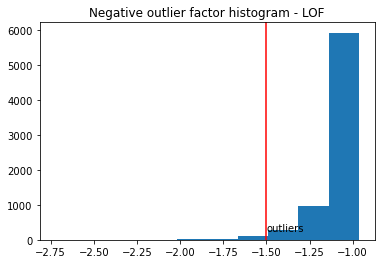

In [32]:
plt.hist(clf_LOF.negative_outlier_factor_, bins=10)
plt.axvline(max_val, c='r')
plt.text(max_val, 250, 'outliers')
plt.title("Negative outlier factor histogram - LOF")

plt.show()
# distribuzione del LOF score, con barra per il minor outlier; 

**Si filtrano gli outliers dal dataset**

In [33]:
# filter outlier values
X[outlier_indexes]

array([[-0.90429967, -0.18193654, -0.44315051, ..., -0.79588617,
        -0.66708465,  0.05421616],
       [-0.81470826, -0.749418  , -0.57189889, ..., -0.18183848,
        -0.58280626, -0.02075593],
       [-0.95650333, -0.83867155, -0.94300953, ..., -0.8713058 ,
        -0.30588411, -0.21333904],
       ...,
       [-0.96086324, -0.74152914, -0.71455023, ..., -0.92345186,
        -0.74744303,  0.11533109],
       [-0.84050976, -0.47090547, -0.66825779, ..., -0.42219231,
        -0.66115362,  0.05793638],
       [-0.91561578, -0.83404281, -0.68623505, ...,  0.32622676,
        -0.86983054,  0.1878809 ]])

In [34]:
X[outliers==-1]

array([[-0.90429967, -0.18193654, -0.44315051, ..., -0.79588617,
        -0.66708465,  0.05421616],
       [-0.81470826, -0.749418  , -0.57189889, ..., -0.18183848,
        -0.58280626, -0.02075593],
       [-0.95650333, -0.83867155, -0.94300953, ..., -0.8713058 ,
        -0.30588411, -0.21333904],
       ...,
       [-0.96086324, -0.74152914, -0.71455023, ..., -0.92345186,
        -0.74744303,  0.11533109],
       [-0.84050976, -0.47090547, -0.66825779, ..., -0.42219231,
        -0.66115362,  0.05793638],
       [-0.91561578, -0.83404281, -0.68623505, ...,  0.32622676,
        -0.86983054,  0.1878809 ]])

In [35]:
y_outliers  = X[outliers==-1]
len(y_outliers)

168

In [36]:
y_outliers

array([[-0.90429967, -0.18193654, -0.44315051, ..., -0.79588617,
        -0.66708465,  0.05421616],
       [-0.81470826, -0.749418  , -0.57189889, ..., -0.18183848,
        -0.58280626, -0.02075593],
       [-0.95650333, -0.83867155, -0.94300953, ..., -0.8713058 ,
        -0.30588411, -0.21333904],
       ...,
       [-0.96086324, -0.74152914, -0.71455023, ..., -0.92345186,
        -0.74744303,  0.11533109],
       [-0.84050976, -0.47090547, -0.66825779, ..., -0.42219231,
        -0.66115362,  0.05793638],
       [-0.91561578, -0.83404281, -0.68623505, ...,  0.32622676,
        -0.86983054,  0.1878809 ]])

**negative_outlier_factor_**

**The opposite LOF of the training samples.** The higher, the more normal.
- Inliers tend to have a **LOF score close to 1 (negative_outlier_factor_ close to -1)**
- Outliers tend to have a **larger LOF score**.

The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors.

### Top 1% outliers

In [37]:
import math

In [38]:
len(clf_LOF.negative_outlier_factor_)

7352

In [39]:
len(X)

7352

In [40]:
top1perc = int(math.ceil(len(y_outliers)*0.01))
top1perc

2

In [41]:
clf_LOF.negative_outlier_factor_

array([-1.24898529, -1.04124322, -0.99154675, ..., -1.03743258,
       -1.03667345, -1.03194227])

Lista avete indice e score per outliers **np.where(y_pred ==-1)**

In [42]:
outlier_factor_list = []

for i in range(0,len(outlier_scores)):
    outlier_factor_list.append((outlier_indexes[i], outlier_scores[i]))
    
outlier_factor_list[:10]

[(27, -1.7972445141270093),
 (30, -1.5865740890875502),
 (33, -1.5858318360996024),
 (66, -1.7883436957873367),
 (67, -1.8445675475673498),
 (69, -1.5492398490721433),
 (70, -2.687153218900557),
 (71, -2.6934737123914974),
 (72, -1.586502234377252),
 (73, -1.7303356018827918)]

In [43]:
def outlier_score(elem):
    return elem[1]

#We sort in ascending order with respect to LOF factor
outlier_factor_list = sorted(outlier_factor_list, key=outlier_score)

In [44]:
len(outlier_factor_list)

168

In [45]:
outlier_factor_list[:23]

[(2451, -2.7254959748371683),
 (71, -2.6934737123914974),
 (70, -2.687153218900557),
 (1209, -2.5016481441079517),
 (2440, -2.4813064909507316),
 (237, -2.2246458653265067),
 (5137, -2.191982850070552),
 (3934, -2.130456148673894),
 (5365, -2.08032817246657),
 (3935, -2.0794144853662813),
 (1826, -2.078514486058537),
 (5708, -2.007441247037878),
 (1369, -1.968679049354905),
 (1925, -1.965772936649855),
 (5351, -1.9622335048997808),
 (5143, -1.9510821699614767),
 (2570, -1.9382255185981634),
 (5152, -1.9166642526474038),
 (5141, -1.9111359916869484),
 (6335, -1.8953629921499127),
 (5142, -1.895118498752789),
 (5149, -1.8928117905543285),
 (5140, -1.8804980773106106)]

In [46]:
min([i[1] for i in outlier_factor_list])

-2.7254959748371683

In [47]:
max([i[1] for i in outlier_factor_list])

-1.5002271630527513

#### TOP 1% outliers

In [48]:
top_outliers_LOF = outlier_factor_list[:top1perc]
len(top_outliers_LOF)

2

In [49]:
top_outliers_LOF[:10]

[(2451, -2.7254959748371683), (71, -2.6934737123914974)]

In [50]:
min([i[1] for i in top_outliers_LOF])

-2.7254959748371683

In [51]:
indexes_list = [i[0] for i in top_outliers_LOF] #retrieve indexes of outliers
indexes_list

[2451, 71]

In [52]:
df_LOF_outliers = df.iloc[indexes_list]

In [53]:
df_LOF_outliers

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
2451,-0.100786,-0.126211,0.359538,-0.092218,-0.149869,0.530467,-0.821282,0.194631,0.366140,-0.397308,...,-0.694358,-0.718708,-0.763534,0.203472,-0.809225,-0.809225,0.012626,-0.043034,-0.220034,6
71,-0.596410,0.024683,-0.160404,-0.631819,-0.068857,-0.235160,-0.866296,-0.249047,0.315453,0.022282,...,0.308823,0.105046,-0.224553,0.555555,-0.612611,-0.612611,0.327527,0.668284,-0.336641,6


In [54]:
#retrieve id of outliers
outliers_id = list(df_LOF_outliers.index)
outliers_id[:10]

[2451, 71]

In [55]:
len(outliers_id)

2

In [56]:
top_outliers_LOF[:5]

[(2451, -2.7254959748371683), (71, -2.6934737123914974)]

In [57]:
top_outliers_lof_id = []

for i, val in top_outliers_LOF:
    top_outliers_lof_id.append((df.iloc[i].name, val))

print("Id with LOF score of outlierness")
top_outliers_lof_id[:10]


Id with LOF score of outlierness


[(2451, -2.7254959748371683), (71, -2.6934737123914974)]

# Model based approaches

# Isolation Forest

In [58]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification

In [59]:
clf_if = IsolationForest(random_state=0)
clf_if.fit(X)

IsolationForest(random_state=0)

#### Decision function

In [60]:
anomlay_score_if = clf_if.decision_function(X)
len(anomlay_score_if)

7352

In [61]:
anomlay_score_if

array([0.09953782, 0.12751923, 0.12844237, ..., 0.04810034, 0.04680641,
       0.05406642])

### Predict

In [62]:
outliers_if = clf_if.predict(X)
np.unique(outliers_if, return_counts=True)

(array([-1,  1]), array([1026, 6326], dtype=int64))

In [63]:
outliers_if

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
outlier_indexes_if = np.where(outliers_if == -1)[0]
outlier_indexes_if

array([  27,   30,   31, ..., 7314, 7321, 7332], dtype=int64)

In [65]:
len(outlier_indexes_if)

1026

In [66]:
outlier_scores_if = anomlay_score_if[np.where(outliers_if==-1)]
len(outlier_scores_if)

1026

In [67]:
indexes_list_if = list(outlier_indexes_if)  #retrieve index of outliers
indexes_list_if

[27,
 30,
 31,
 32,
 51,
 64,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 134,
 135,
 136,
 137,
 141,
 237,
 238,
 240,
 299,
 347,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 361,
 362,
 363,
 378,
 384,
 385,
 386,
 390,
 404,
 450,
 480,
 481,
 482,
 483,
 485,
 486,
 487,
 522,
 536,
 537,
 538,
 539,
 552,
 564,
 565,
 578,
 594,
 688,
 690,
 691,
 692,
 698,
 699,
 703,
 716,
 717,
 727,
 739,
 753,
 797,
 818,
 819,
 847,
 848,
 861,
 862,
 874,
 886,
 896,
 947,
 950,
 951,
 952,
 953,
 954,
 955,
 956,
 957,
 958,
 959,
 960,
 961,
 962,
 963,
 964,
 965,
 1020,
 1035,
 1039,
 1040,
 1041,
 1049,
 1050,
 1051,
 1062,
 1063,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1156,
 1161,
 1162,
 1163,
 1170,
 1183,
 1185,
 1186,
 1194,
 1209,
 1210,
 1211,
 1223,
 1224,
 1242,
 1243,
 1247,
 1253,
 1256,
 1259,
 1260,
 1263,
 1265,
 1266,
 1267,
 1268,
 1269,
 1270,
 12

In [68]:
len(outlier_indexes_if)

1026

In [69]:
np.min(outlier_scores_if)

-0.25867063983238714

In [70]:
np.max(outlier_scores_if)

-5.09501591428041e-06

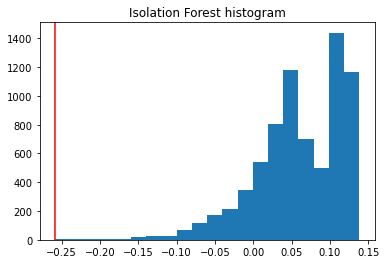

In [71]:
plt.hist(anomlay_score_if, bins=20)
plt.axvline(np.min(outlier_scores_if), c='r')

plt.title("Isolation Forest histogram")
plt.show()

### Top 1% outliers

In [72]:
len(outlier_scores_if)

1026

In [73]:
outlier_if_list = []

for i in range(0,len(outlier_scores_if)):
    outlier_if_list.append((outlier_indexes_if[i], outlier_scores_if[i]))
    
outlier_if_list

[(27, -0.05994842710888082),
 (30, -0.08081437404923353),
 (31, -0.06436749534973951),
 (32, -0.04915468817962365),
 (51, -0.013472125115483125),
 (64, -0.07205916433872872),
 (66, -0.09361588781270314),
 (67, -0.0849551583240914),
 (68, -0.04510066855663719),
 (69, -0.0961089157189513),
 (70, -0.0787550447070463),
 (71, -0.09015195827016442),
 (72, -0.10078490217118019),
 (134, -0.021898925074854136),
 (135, -0.011354838086430896),
 (136, -0.010796794305658497),
 (137, -0.03648854620799369),
 (141, -0.005709318905482319),
 (237, -0.08364663306550646),
 (238, -0.11206373651916668),
 (240, -0.012689213489366469),
 (299, -0.022503690609371296),
 (347, -0.08313891388106853),
 (352, -0.012441357928782981),
 (353, -0.014816258684511308),
 (354, -0.0015007527961632405),
 (355, -0.027455269357764878),
 (356, -0.05303838983665976),
 (357, -0.05035489640188151),
 (358, -0.010942815794374394),
 (361, -0.015312465199350589),
 (362, -0.009936777172447786),
 (363, -0.013592637569543431),
 (378, -0.

In [74]:
def outlier_score(elem):
    return elem[1]
outlier_if_list = sorted(outlier_if_list, key=outlier_score, reverse = True)

In [75]:
outlier_if_list[:10]

[(5458, -5.09501591428041e-06),
 (3772, -6.265601444344071e-05),
 (3039, -0.00010802317824853969),
 (2277, -0.0002236334182681432),
 (5236, -0.00028616526012470445),
 (1694, -0.0003135311276285524),
 (5202, -0.00036661040534702316),
 (1459, -0.000545860909360707),
 (6771, -0.0006168779512837341),
 (6243, -0.0006229914243215395)]

In [76]:
top1perc = int(math.ceil(len(outlier_indexes_if))*0.01)
top1perc

10

In [77]:
top_outliers_if = outlier_if_list[:top1perc]
top_outliers_if

[(5458, -5.09501591428041e-06),
 (3772, -6.265601444344071e-05),
 (3039, -0.00010802317824853969),
 (2277, -0.0002236334182681432),
 (5236, -0.00028616526012470445),
 (1694, -0.0003135311276285524),
 (5202, -0.00036661040534702316),
 (1459, -0.000545860909360707),
 (6771, -0.0006168779512837341),
 (6243, -0.0006229914243215395)]

In [78]:
indexes_list_if = [i[0] for i in top_outliers_if] #retrieve index of outliers
indexes_list_if

[5458, 3772, 3039, 2277, 5236, 1694, 5202, 1459, 6771, 6243]

In [79]:
df_if_outliers = df.iloc[indexes_list_if]
df_if_outliers

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
5458,-0.473340,-0.146694,-0.199407,-0.518846,-0.192398,-0.128791,-0.284777,-0.051416,-0.366850,0.393048,...,-0.316112,-0.486894,-0.637050,0.319292,-0.736549,-0.736549,0.177067,-0.787769,0.244190,2
3772,-0.081085,0.615068,-0.098486,-0.136753,0.650174,-0.105164,-0.159385,0.062008,-0.283067,-0.275948,...,-0.343323,-0.314039,-0.414364,0.610360,-0.451024,-0.451024,0.535040,-0.651644,0.337251,2
3039,-0.465460,-0.284660,-0.247826,-0.500613,-0.348266,-0.238325,-0.334774,-0.078703,-0.404051,0.456334,...,-0.645842,-0.738495,-0.748609,0.206283,-0.859158,-0.859158,-0.096042,-0.504034,0.295964,2
2277,-0.905218,-0.822848,-0.919588,-0.910100,-0.844418,-0.921173,-0.783909,-0.501027,-0.783733,0.802242,...,-0.818211,-0.870260,-0.935782,-0.117835,-0.953483,-0.953483,-0.482430,0.424684,-0.323592,6
5236,-0.389400,-0.300514,-0.370756,-0.453102,-0.331821,-0.374976,-0.178840,-0.192885,-0.450500,0.402233,...,-0.291071,-0.379449,-0.592107,0.383875,-0.824198,-0.824198,0.011050,-0.707186,0.178271,2
1694,-0.291505,0.357287,-0.359078,-0.325987,0.265722,-0.351324,-0.064457,0.148365,-0.296745,0.182855,...,-0.167049,-0.141160,-0.036514,0.742127,-0.333793,-0.333793,0.546077,-0.750530,0.268705,1
5202,-0.589970,-0.076626,-0.500837,-0.605474,-0.142798,-0.506696,-0.533485,-0.150922,-0.461701,0.501351,...,-0.455499,-0.508329,-0.529039,0.390959,-0.746411,-0.746411,0.147525,-0.691663,0.153974,1
1459,-0.383088,-0.486195,-0.150383,-0.450391,-0.512334,-0.136913,-0.218716,-0.284405,-0.431437,0.448695,...,-0.525641,-0.572692,-0.560734,0.280802,-0.734019,-0.734019,0.157936,-0.485035,0.202944,2
6771,0.085903,0.087982,-0.156249,-0.044929,-0.144519,-0.154233,0.510745,0.052021,0.240877,0.102999,...,-0.257588,-0.348083,-0.288011,0.528343,-0.590603,-0.590603,0.350246,-0.863298,0.139679,3
6243,-0.951032,-0.861241,-0.916772,-0.960210,-0.855654,-0.926574,-0.865596,-0.470170,-0.708543,0.773709,...,-0.872593,-0.838741,-0.862933,0.032901,-0.866465,-0.866465,-0.109219,-0.773750,0.253292,5


In [80]:
#retrieve id of outliers
outliers_id_if = list(df_if_outliers.index)
outliers_id_if[:10]

[5458, 3772, 3039, 2277, 5236, 1694, 5202, 1459, 6771, 6243]

In [81]:
len(outliers_id_if)

10

In [82]:
top_outliers_if[:5]

[(5458, -5.09501591428041e-06),
 (3772, -6.265601444344071e-05),
 (3039, -0.00010802317824853969),
 (2277, -0.0002236334182681432),
 (5236, -0.00028616526012470445)]

In [83]:
top_outliers_if_id = []

for i, val in top_outliers_if:
    top_outliers_if_id.append((df.iloc[i].name, val))

print("Iid with if score of outlierness")
top_outliers_if_id[:10]

Iid with if score of outlierness


[(5458, -5.09501591428041e-06),
 (3772, -6.265601444344071e-05),
 (3039, -0.00010802317824853969),
 (2277, -0.0002236334182681432),
 (5236, -0.00028616526012470445),
 (1694, -0.0003135311276285524),
 (5202, -0.00036661040534702316),
 (1459, -0.000545860909360707),
 (6771, -0.0006168779512837341),
 (6243, -0.0006229914243215395)]

In [84]:
len(top_outliers_if_id)

10

#### Grid search IF

# Angle-based approach

## ABOD

### Test

#### Best ABOD

In [85]:
clf_ABOD = ABOD(n_neighbors = 10 )
clf_ABOD.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=10)

**Decision_scores_**
**The outlier scores of the training data.** The higher, the more abnormal.
- Outliers tend to have higher scores. This value is available once the detector is fitted

In [86]:
clf_ABOD.decision_scores_

array([-3.92276856e-01, -2.12682957e+00, -9.11931581e+00, ...,
       -5.43712827e-03, -8.87277122e-03, -1.56208293e-02])

In [87]:
outliers_ABOD = clf_ABOD.predict(X)
np.unique(outliers_ABOD, return_counts=True)

(array([0, 1]), array([6623,  729], dtype=int64))

In [88]:
np.where(outliers_ABOD==1)

(array([  30,   31,   66,   67,   69,   70,   71,   72,   78,   82,   83,
         111,  130,  131,  134,  135,  136,  137,  138,  139,  140,  142,
         144,  145,  146,  147,  175,  237,  238,  270,  296,  297,  298,
         299,  300,  332,  333,  335,  339,  340,  343,  344,  347,  469,
         473,  475,  476,  478,  481,  482,  483,  485,  486,  487,  491,
         499,  500,  514,  515,  516,  564,  565,  639,  640,  648,  649,
         652,  657,  716,  767,  797,  799,  802,  804,  813,  814,  817,
         818,  819,  821,  831,  836,  843,  844,  930,  934,  946,  948,
         949,  950,  951,  952,  953,  954,  955,  956,  957,  958,  959,
         960,  961,  962,  964,  965,  968,  969,  970,  976,  983,  989,
        1062, 1085, 1098, 1107, 1109, 1110, 1111, 1112, 1114, 1115, 1116,
        1117, 1118, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128,
        1129, 1130, 1140, 1141, 1147, 1209, 1210, 1242, 1243, 1255, 1266,
        1267, 1268, 1269, 1270, 1271, 

In [89]:
outlier_indexes_abod = np.where(outliers_ABOD==1)[0]
len(outlier_indexes_abod)

729

In [90]:
outlier_indexes_abod

array([  30,   31,   66,   67,   69,   70,   71,   72,   78,   82,   83,
        111,  130,  131,  134,  135,  136,  137,  138,  139,  140,  142,
        144,  145,  146,  147,  175,  237,  238,  270,  296,  297,  298,
        299,  300,  332,  333,  335,  339,  340,  343,  344,  347,  469,
        473,  475,  476,  478,  481,  482,  483,  485,  486,  487,  491,
        499,  500,  514,  515,  516,  564,  565,  639,  640,  648,  649,
        652,  657,  716,  767,  797,  799,  802,  804,  813,  814,  817,
        818,  819,  821,  831,  836,  843,  844,  930,  934,  946,  948,
        949,  950,  951,  952,  953,  954,  955,  956,  957,  958,  959,
        960,  961,  962,  964,  965,  968,  969,  970,  976,  983,  989,
       1062, 1085, 1098, 1107, 1109, 1110, 1111, 1112, 1114, 1115, 1116,
       1117, 1118, 1119, 1121, 1122, 1123, 1124, 1125, 1126, 1127, 1128,
       1129, 1130, 1140, 1141, 1147, 1209, 1210, 1242, 1243, 1255, 1266,
       1267, 1268, 1269, 1270, 1271, 1272, 1273, 12

In [91]:
outlier_scores_abod = clf_ABOD.decision_scores_[outlier_indexes_abod]
len(outlier_scores_abod)

729

In [92]:
np.min(outlier_scores_abod)

-0.013367449129385053

In [93]:
np.max(outlier_scores_abod)

-1.855969016629208e-05

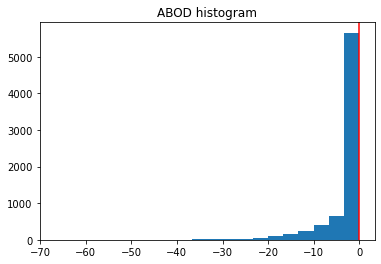

In [94]:
plt.hist(clf_ABOD.decision_scores_, bins=20)
plt.axvline(np.min(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)]), c='r')
plt.title("ABOD histogram")
plt.show()

**Outliers ABOD**

In [95]:
y_outliers_ABOD = X[outliers_ABOD==1]
y_outliers_ABOD

array([[-0.81470826, -0.749418  , -0.57189889, ..., -0.18183848,
        -0.58280626, -0.02075593],
       [-0.75839283, -0.58653735, -0.43911019, ..., -0.18772163,
        -0.5529392 , -0.05353899],
       [-0.63313536, -0.18977503, -0.31933629, ...,  0.14592704,
         0.27208294, -0.53412217],
       ...,
       [ 0.1374781 ,  0.11749594, -0.19192202, ...,  0.37030932,
        -0.87231338,  0.1663592 ],
       [ 0.07370533,  0.10859542, -0.06066112, ...,  0.34419255,
        -0.88192001,  0.13978489],
       [ 0.12989904,  0.29977405, -0.14397559, ...,  0.45068841,
        -0.89318645,  0.12404852]])

In [96]:
len(y_outliers_ABOD)

729

### Top 1% outliers

In [97]:
outlier_abod_list = []

for i in range(0,len(outlier_scores_abod)):
    outlier_abod_list.append((outlier_indexes_abod[i], outlier_scores_abod[i]))
    
outlier_abod_list

[(30, -0.002411443763998592),
 (31, -0.0015716492101211048),
 (66, -0.0007346395685400422),
 (67, -0.00086458890513207),
 (69, -0.0021027405863773183),
 (70, -0.00012155662943744781),
 (71, -0.00012621838871245327),
 (72, -0.0015989618645268402),
 (78, -0.0019190931604289828),
 (82, -0.0044006066293666955),
 (83, -0.0038736108707997825),
 (111, -0.002565909817381102),
 (130, -0.0028176530076876945),
 (131, -0.0017434518541792783),
 (134, -0.0027082333259504125),
 (135, -0.004101408404049045),
 (136, -0.002621010368582043),
 (137, -0.0009381593831325054),
 (138, -0.0018480598942588577),
 (139, -0.003027132885736592),
 (140, -0.0030715931354435714),
 (142, -0.005248410956061716),
 (144, -0.001989310781444177),
 (145, -0.0022376251484984735),
 (146, -0.0030569761939789808),
 (147, -0.003804826667364835),
 (175, -0.004045131505866192),
 (237, -0.0004281599299283339),
 (238, -0.0005364795272854151),
 (270, -0.013367449129385053),
 (296, -0.003499335215980202),
 (297, -0.004395687134549126),

In [98]:
def outlier_score(elem):
    return elem[1]
outlier_abod_list = sorted(outlier_abod_list, key=outlier_score, reverse = True)

In [99]:
np.min(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)])

-0.013367449129385053

In [100]:
np.max(clf_ABOD.decision_scores_[np.where(outliers_ABOD==1)])

-1.855969016629208e-05

In [101]:
outlier_abod_list[:10]

[(3934, -1.855969016629208e-05),
 (3939, -6.350892281194588e-05),
 (5137, -6.757784411205935e-05),
 (4828, -6.972770493107402e-05),
 (3785, -8.361148915653023e-05),
 (564, -0.00010517926316355466),
 (2532, -0.00011045715937231265),
 (70, -0.00012155662943744781),
 (71, -0.00012621838871245327),
 (3935, -0.00017305551133897315)]

In [102]:
min([i[1] for i in outlier_abod_list])

-0.013367449129385053

In [103]:
max([i[1] for i in outlier_abod_list])

-1.855969016629208e-05

**Top 1%**

In [104]:
top1perc = int(math.ceil(len(y_outliers_ABOD))*0.01)

top_outliers_ABOD = outlier_abod_list[:top1perc]
len(top_outliers_ABOD)

7

In [105]:
top_outliers_ABOD

[(3934, -1.855969016629208e-05),
 (3939, -6.350892281194588e-05),
 (5137, -6.757784411205935e-05),
 (4828, -6.972770493107402e-05),
 (3785, -8.361148915653023e-05),
 (564, -0.00010517926316355466),
 (2532, -0.00011045715937231265)]

In [106]:
indexes_list_ABOD = [i[0] for i in top_outliers_ABOD] #retrieve index of outliers
indexes_list_ABOD

[3934, 3939, 5137, 4828, 3785, 564, 2532]

In [107]:
df_ABOD_outliers = df.iloc[indexes_list_ABOD]

In [108]:
df_ABOD_outliers

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
3934,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,0.088213,0.315619,-0.679553,...,-0.006612,0.732933,0.044442,0.858826,1.000000,1.000000,1.000000,-0.723711,0.228629,3
3939,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,0.389685,0.111722,-0.553313,...,0.140450,0.340270,-0.020790,0.869909,0.128836,0.128836,0.771030,-0.668652,0.228409,3
5137,-0.703402,0.672487,-0.464985,-0.704548,0.967664,-0.401827,-0.948813,-0.511096,-0.345057,0.358381,...,-0.614462,-0.785936,-0.921098,-0.102993,-0.944109,-0.944109,-0.431083,0.683948,-0.505728,6
4828,0.214658,0.068843,0.328658,0.048201,0.017427,0.164410,0.679843,0.344488,1.000000,-0.934827,...,0.843418,1.000000,1.000000,1.000000,0.658404,0.658404,0.937460,-0.850682,0.172705,3
3785,0.717955,0.147642,-0.229651,0.721750,0.133353,-0.249371,0.685612,0.173949,-0.449448,-0.505090,...,1.000000,0.431894,-0.035806,0.751550,-0.459933,-0.459933,0.497080,-0.776798,0.246501,3
564,-0.738075,-0.177243,0.364114,-0.782040,-0.205724,0.554965,-0.711757,-0.259810,-0.311144,0.408004,...,-0.223847,-0.370413,-0.635677,0.406772,-0.802948,-0.802948,0.056297,-0.892539,0.038530,4
2532,-0.320417,0.517275,1.000000,-0.381541,0.530447,1.000000,-0.369909,0.376768,0.861215,-0.125482,...,0.730991,0.707491,0.746730,0.875707,0.283335,0.283335,0.827130,-0.261964,0.311073,2


In [109]:
#retrieve id of outliers
outliers_id_abod = list(df_ABOD_outliers.index)
outliers_id_abod[:10]

[3934, 3939, 5137, 4828, 3785, 564, 2532]

In [110]:
len(outliers_id_abod)

7

In [111]:
top_outliers_ABOD[:5]

[(3934, -1.855969016629208e-05),
 (3939, -6.350892281194588e-05),
 (5137, -6.757784411205935e-05),
 (4828, -6.972770493107402e-05),
 (3785, -8.361148915653023e-05)]

In [112]:
top_outliers_ABOD_id = []

for i, val in top_outliers_ABOD:
    top_outliers_ABOD_id.append((df.iloc[i].name, val))

print("id with ABOD score of outlierness")
top_outliers_ABOD_id[:10]

id with ABOD score of outlierness


[(3934, -1.855969016629208e-05),
 (3939, -6.350892281194588e-05),
 (5137, -6.757784411205935e-05),
 (4828, -6.972770493107402e-05),
 (3785, -8.361148915653023e-05),
 (564, -0.00010517926316355466),
 (2532, -0.00011045715937231265)]

In [113]:
len(top_outliers_ABOD_id)

7

## ABOD n_neighbors = 5 NOOO

In [114]:
clf_ABOD_2 = ABOD(n_neighbors=5)
clf_ABOD_2.fit(X)

ABOD(contamination=0.1, method='fast', n_neighbors=5)

**Decision_scores_**
**The outlier scores of the training data.** The higher, the more abnormal.
- Outliers tend to have higher scores. This value is available once the detector is fitted

In [115]:
clf_ABOD_2.decision_scores_

array([-4.31949049e-01, -1.70326924e+00, -1.76398039e+01, ...,
       -8.39607936e-03, -1.10418507e-02, -1.15869725e-02])

In [116]:
outliers_ABOD_2 = clf_ABOD_2.predict(X)
np.unique(outliers_ABOD_2, return_counts=True)

(array([0, 1]), array([6475,  877], dtype=int64))

In [117]:
np.where(outliers_ABOD_2==1)

(array([  31,   66,   67,   69,   70,   71,   72,   78,   79,   82,   83,
          91,  103,  107,  111,  130,  131,  132,  134,  136,  137,  138,
         139,  141,  142,  146,  148,  152,  167,  170,  174,  175,  237,
         238,  270,  272,  298,  299,  300,  308,  309,  330,  332,  334,
         335,  338,  343,  344,  345,  385,  390,  466,  467,  473,  475,
         476,  478,  480,  481,  482,  483,  485,  486,  487,  498,  500,
         514,  515,  519,  536,  564,  615,  637,  640,  642,  644,  645,
         647,  648,  658,  659,  716,  768,  778,  797,  804,  805,  807,
         809,  811,  812,  814,  817,  818,  819,  821,  827,  831,  835,
         838,  842,  843,  846,  930,  931,  934,  937,  941,  949,  950,
         951,  953,  955,  956,  957,  959,  960,  961,  962,  963,  964,
         965,  968,  969,  970,  971,  979,  983, 1062, 1077, 1085, 1091,
        1098, 1107, 1108, 1109, 1110, 1111, 1112, 1114, 1115, 1116, 1118,
        1119, 1121, 1124, 1125, 1127, 

In [118]:
outlier_indexes_abod_2 = np.where(outliers_ABOD_2==1)[0]
len(outlier_indexes_abod_2)

877

In [119]:
outlier_scores_abod_2 = clf_ABOD_2.decision_scores_[outlier_indexes_abod_2]
len(outlier_scores_abod_2)

877

In [120]:
np.min(outlier_scores_abod_2)

-0.047937651546044374

In [121]:
np.max(outlier_scores_abod_2)

-3.841734412033528e-05

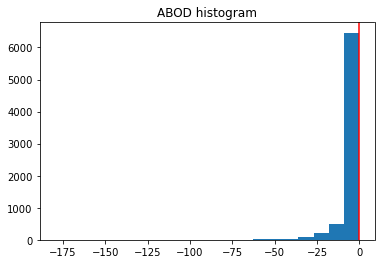

In [122]:
plt.hist(clf_ABOD_2.decision_scores_, bins=20)
plt.axvline(np.min(clf_ABOD_2.decision_scores_[np.where(outliers_ABOD_2==1)]), c='r')
plt.title("ABOD histogram")
plt.show()

**Outliers ABOD**

In [123]:
y_outliers_ABOD_2 = X[outliers_ABOD_2==1]
len(y_outliers_ABOD_2)

877

### Top 1% outliers

In [124]:
outlier_abod_list_2 = []

for i in range(0,len(outlier_scores_abod_2)):
    outlier_abod_list_2.append((outlier_indexes_abod_2[i], outlier_scores_abod_2[i]))
    
outlier_abod_list_2

[(31, -0.002319388668517779),
 (66, -0.0006847915520918973),
 (67, -0.0008960046473734017),
 (69, -0.0007474839732325632),
 (70, -4.305803091621057e-05),
 (71, -0.00022742459884685283),
 (72, -0.0015060369385680463),
 (78, -0.001604980605131821),
 (79, -0.004478449565349598),
 (82, -0.0007751251738554356),
 (83, -0.002905821022373585),
 (91, -0.006013553146324975),
 (103, -0.0048129819919444),
 (107, -0.002995033848203231),
 (111, -0.0027881365937006746),
 (130, -0.001771968570904983),
 (131, -0.002474171584042984),
 (132, -0.004989385676656937),
 (134, -0.0020213159057079666),
 (136, -0.0038623320931830867),
 (137, -0.00034935003999468444),
 (138, -0.0024602008583648515),
 (139, -0.003012687880991451),
 (141, -0.004083602245447596),
 (142, -0.0026350742280177577),
 (146, -0.002506558434055943),
 (148, -0.0031384792875690905),
 (152, -0.003662577287452324),
 (167, -0.006985126965553029),
 (170, -0.0015750495357372228),
 (174, -0.00709608552403887),
 (175, -0.002582549746421058),
 (237,

In [125]:
def outlier_score(elem):
    return elem[1]
outlier_abod_list_2 = sorted(outlier_abod_list_2, key=outlier_score, reverse = True)

In [126]:
np.min(clf_ABOD_2.decision_scores_[np.where(outliers_ABOD_2==1)])

-0.047937651546044374

In [127]:
np.max(clf_ABOD_2.decision_scores_[np.where(outliers_ABOD_2==1)])

-3.841734412033528e-05

In [128]:
outlier_abod_list_2[:10]

[(2532, -3.841734412033528e-05),
 (70, -4.305803091621057e-05),
 (3934, -4.377196988763587e-05),
 (3750, -4.598178582704238e-05),
 (3785, -4.7107661715575626e-05),
 (5137, -5.569967819675474e-05),
 (4828, -0.00010186333435856453),
 (3939, -0.00010365622238500783),
 (3953, -0.00010906319246924286),
 (4827, -0.00011182361489113266)]

In [129]:
min([i[1] for i in outlier_abod_list_2])

-0.047937651546044374

In [130]:
max([i[1] for i in outlier_abod_list_2])

-3.841734412033528e-05

**Top 1%**

In [131]:
top1perc = int(math.ceil(len(y_outliers_ABOD_2))*0.01)

top_outliers_ABOD_2 = outlier_abod_list_2[:top1perc]
len(top_outliers_ABOD_2)

8

In [132]:
indexes_list_ABOD_2 = [i[0] for i in top_outliers_ABOD_2] #retrieve index of outliers

In [133]:
df_ABOD_outliers_2 = df.iloc[indexes_list_ABOD_2]

In [134]:
df_ABOD_outliers_2

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
2532,-0.320417,0.517275,1.000000,-0.381541,0.530447,1.000000,-0.369909,0.376768,0.861215,-0.125482,...,0.730991,0.707491,0.746730,0.875707,0.283335,0.283335,0.827130,-0.261964,0.311073,2
70,-0.599392,0.532506,0.004324,-0.664108,0.502260,0.048472,-0.717081,-0.182864,0.315453,0.022282,...,0.353106,-0.102020,-0.380786,0.440821,-0.608228,-0.608228,0.349807,0.508733,-0.496132,6
3934,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,0.088213,0.315619,-0.679553,...,-0.006612,0.732933,0.044442,0.858826,1.000000,1.000000,1.000000,-0.723711,0.228629,3
3750,-0.220611,0.273957,-0.275743,-0.282899,0.204550,-0.280718,0.249069,0.251656,-0.320682,0.006745,...,0.569543,0.398592,0.090965,0.803567,-0.355495,-0.355495,0.546964,-0.736741,0.276870,1
3785,0.717955,0.147642,-0.229651,0.721750,0.133353,-0.249371,0.685612,0.173949,-0.449448,-0.505090,...,1.000000,0.431894,-0.035806,0.751550,-0.459933,-0.459933,0.497080,-0.776798,0.246501,3
5137,-0.703402,0.672487,-0.464985,-0.704548,0.967664,-0.401827,-0.948813,-0.511096,-0.345057,0.358381,...,-0.614462,-0.785936,-0.921098,-0.102993,-0.944109,-0.944109,-0.431083,0.683948,-0.505728,6
4828,0.214658,0.068843,0.328658,0.048201,0.017427,0.164410,0.679843,0.344488,1.000000,-0.934827,...,0.843418,1.000000,1.000000,1.000000,0.658404,0.658404,0.937460,-0.850682,0.172705,3
3939,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,0.389685,0.111722,-0.553313,...,0.140450,0.340270,-0.020790,0.869909,0.128836,0.128836,0.771030,-0.668652,0.228409,3


In [135]:
#retrieve  id of outliers
outliers_id_abod_2 = list(df_ABOD_outliers_2.index)
outliers_id_abod_2[:10]

[2532, 70, 3934, 3750, 3785, 5137, 4828, 3939]

In [136]:
len(outliers_id_abod_2)

8

In [137]:
top_outliers_ABOD_2[:5]

[(2532, -3.841734412033528e-05),
 (70, -4.305803091621057e-05),
 (3934, -4.377196988763587e-05),
 (3750, -4.598178582704238e-05),
 (3785, -4.7107661715575626e-05)]

In [138]:
top_outliers_ABOD_id_2 = []

for i, val in top_outliers_ABOD_2:
    top_outliers_ABOD_id_2.append((df.iloc[i].name, val))

print("id with ABOD score of outlierness")
top_outliers_ABOD_id_2[:10]

id with ABOD score of outlierness


[(2532, -3.841734412033528e-05),
 (70, -4.305803091621057e-05),
 (3934, -4.377196988763587e-05),
 (3750, -4.598178582704238e-05),
 (3785, -4.7107661715575626e-05),
 (5137, -5.569967819675474e-05),
 (4828, -0.00010186333435856453),
 (3939, -0.00010365622238500783)]

In [139]:
len(top_outliers_ABOD_id_2)

8

# Distance based (KNN)

## KNN

In [140]:
clf_KNN = KNN(n_neighbors=117)
clf_KNN.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=117, p=2,
  radius=1.0)

**Decision_scores_**

**The outlier scores of the training data.** The higher, the more abnormal. Outliers tend to have higher scores. This value is available once the detector is fitted.

In [141]:
clf_KNN.decision_scores_

array([0.77694542, 0.51471277, 0.42304202, ..., 2.20580366, 2.26486713,
       2.20293722])

**Decision function**

In [142]:
anomlay_score = clf_KNN.decision_function(X)
anomlay_score

array([0.77677906, 0.51460731, 0.42219668, ..., 2.2049428 , 2.26269742,
       2.20147321])

**Predict**

In [143]:
outliers_KNN = clf_KNN.predict(X)
np.unique(outliers_KNN, return_counts=True)

(array([0, 1]), array([6626,  726], dtype=int64))

In [144]:
outlier_indexes_knn = np.where(outliers_KNN==1)[0]
outlier_indexes_knn

array([  27,   30,   31,   64,   66,   67,   69,   70,   71,   72,  131,
        134,  135,  136,  137,  138,  237,  238,  299,  305,  344,  347,
        378,  385,  386,  481,  482,  483,  486,  487,  536,  552,  564,
        565,  639,  640,  648,  649,  688,  703,  716,  797,  799,  818,
        819,  847,  861,  950,  951,  954,  956,  957,  961,  962,  964,
        965, 1049, 1062, 1098, 1107, 1108, 1109, 1110, 1111, 1112, 1113,
       1114, 1115, 1116, 1117, 1118, 1119, 1121, 1122, 1123, 1125, 1126,
       1127, 1209, 1210, 1223, 1242, 1243, 1266, 1267, 1268, 1269, 1270,
       1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281,
       1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1301, 1302, 1304,
       1308, 1309, 1311, 1312, 1343, 1355, 1369, 1383, 1401, 1402, 1403,
       1407, 1408, 1412, 1413, 1416, 1419, 1420, 1421, 1422, 1423, 1424,
       1428, 1429, 1430, 1431, 1432, 1433, 1434, 1439, 1440, 1441, 1442,
       1443, 1444, 1445, 1446, 1447, 1448, 1449, 15

In [145]:
len(outlier_indexes_knn)

726

In [146]:
outlier_scores_knn = clf_KNN.decision_scores_[outlier_indexes_knn]

In [147]:
outlier_scores_knn

array([ 3.5493366 ,  2.82742334,  3.13126968,  2.81922142,  4.75713347,
        4.38602853,  3.70417741,  5.65205349,  5.39570396,  4.59807411,
        2.65203035,  2.83423206,  2.65152731,  2.78405726,  3.0953661 ,
        2.82408784,  4.70316666,  5.12612304,  2.77120683,  2.65163962,
        2.67229864,  3.11931291,  2.86623825,  2.72706012,  2.93019773,
        3.84317742,  2.96155369,  3.04725788,  3.24317469,  4.3510224 ,
        2.66859043,  2.73108909,  3.3488739 ,  2.65006277,  2.75166606,
        2.88500062,  2.67081996,  2.90876864,  2.7975682 ,  3.28718058,
        3.51241825,  2.64631756,  2.6383189 ,  3.33544443,  3.37426178,
        2.83116688,  3.09539259,  2.97469629,  3.12427627,  2.73075619,
        2.78485737,  2.86026061,  2.8310814 ,  2.67176633,  2.67438126,
        2.66543624,  2.81737472,  4.84801327,  2.69234424,  2.71964922,
        2.68623518,  3.01646336,  4.41050229,  4.67941955,  3.18339931,
        2.68270132,  3.39715497,  3.16674579,  2.64633313,  3.06

In [148]:
len(outlier_scores_knn)

726

In [149]:
np.min(outlier_scores_knn)

2.636720706613882

In [150]:
np.max(outlier_scores_knn)

10.001094661768287

In [151]:
np.max(anomlay_score[np.where(outliers_KNN==1)])

9.992294774394828

In [152]:
np.mean(anomlay_score[np.where(outliers_KNN==1)])

3.418992649710602

In [153]:
np.mean(anomlay_score[np.where(outliers_KNN==0)])

1.3246399200990304

In [154]:
np.mean(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

3.4232220820198234

In [155]:
np.mean(clf_KNN.decision_scores_[np.where(outliers_KNN==0)])

1.3264410340146275

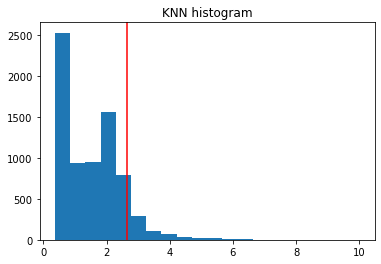

In [156]:
plt.hist(clf_KNN.decision_scores_, bins=20)
plt.axvline(np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)]), c='r')
plt.title("KNN histogram")
plt.show()

## Top 1% outliers

In [157]:
outlier_knn_list = []

for i in range(0,len(outlier_scores_knn)):
    outlier_knn_list.append((outlier_indexes_knn[i], outlier_scores_knn[i]))
    
outlier_knn_list[:10]

[(27, 3.549336603910223),
 (30, 2.8274233385115726),
 (31, 3.1312696836206007),
 (64, 2.8192214158814637),
 (66, 4.7571334677855495),
 (67, 4.386028532509475),
 (69, 3.70417741442043),
 (70, 5.6520534873174775),
 (71, 5.395703961974711),
 (72, 4.59807410788375)]

In [158]:
outlier_knn_list = sorted(outlier_knn_list, key=outlier_score, reverse = True)

In [159]:
np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

2.636720706613882

In [160]:
np.max(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

10.001094661768287

In [161]:
outlier_knn_list[:10]

[(3934, 10.001094661768287),
 (3935, 9.73850685164346),
 (3939, 8.12581442886731),
 (5137, 7.602099773170166),
 (3936, 7.177330490756545),
 (3938, 7.161082106247716),
 (3764, 6.988528693140058),
 (3929, 6.856232879812174),
 (3930, 6.643149230261197),
 (2451, 6.616887413960428)]

### Top 1%

In [162]:
top1perc = int(math.ceil(len(outlier_indexes_knn))*0.01)

In [163]:
top_outliers_knn = outlier_knn_list[:top1perc]

In [164]:
indexes_list_knn = [i[0] for i in top_outliers_knn] #retrieve index of outliers

In [165]:
df_knn_outliers = df.iloc[indexes_list_knn]

In [166]:
df_knn_outliers

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
3934,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,0.088213,0.315619,-0.679553,...,-0.006612,0.732933,0.044442,0.858826,1.000000,1.000000,1.000000,-0.723711,0.228629,3
3935,0.876942,0.729609,0.551648,0.852822,0.644811,0.542567,0.907994,0.409035,0.171438,-0.679553,...,0.172967,0.827784,0.212119,0.968985,0.866856,0.866856,0.904612,-0.708794,0.239055,3
3939,1.000000,0.753928,0.217305,1.000000,0.722617,0.179957,1.000000,0.389685,0.111722,-0.553313,...,0.140450,0.340270,-0.020790,0.869909,0.128836,0.128836,0.771030,-0.668652,0.228409,3
5137,-0.703402,0.672487,-0.464985,-0.704548,0.967664,-0.401827,-0.948813,-0.511096,-0.345057,0.358381,...,-0.614462,-0.785936,-0.921098,-0.102993,-0.944109,-0.944109,-0.431083,0.683948,-0.505728,6
3936,0.786675,0.419288,0.388652,0.780326,0.377150,0.368848,0.907994,0.409035,0.171438,-0.351304,...,0.179594,0.561329,0.054411,0.891407,0.608390,0.608390,0.924941,-0.726711,0.226650,3
3938,0.817104,0.873037,0.127390,0.734566,0.845695,0.111837,0.803192,0.389685,0.111722,-0.553313,...,0.072248,0.409163,0.097462,0.776041,0.127603,0.127603,0.756433,-0.729349,0.208647,3
3764,0.735458,0.837393,-0.125445,0.680145,0.888199,-0.153410,0.798429,0.157986,-0.217214,-0.207569,...,0.712707,0.492695,0.163178,0.793802,-0.150642,-0.150642,0.770089,-0.731049,0.271633,3


In [167]:
#retrieve track id of outliers
outliers_id_knn = list(df_knn_outliers.index)
outliers_id_knn[:10]

[3934, 3935, 3939, 5137, 3936, 3938, 3764]

In [168]:
len(outliers_id_knn)

7

In [169]:
np.min(clf_KNN.decision_scores_[np.where(outliers_KNN==1)])

2.636720706613882

In [170]:
top_outliers_knn[:5]

[(3934, 10.001094661768287),
 (3935, 9.73850685164346),
 (3939, 8.12581442886731),
 (5137, 7.602099773170166),
 (3936, 7.177330490756545)]

In [171]:
top_outliers_knn_id = []

for i, val in top_outliers_knn:
    top_outliers_knn_id.append((df.iloc[i].name, val))

print("id with knn score of outlierness")
top_outliers_knn_id[:10]

id with knn score of outlierness


[(3934, 10.001094661768287),
 (3935, 9.73850685164346),
 (3939, 8.12581442886731),
 (5137, 7.602099773170166),
 (3936, 7.177330490756545),
 (3938, 7.161082106247716),
 (3764, 6.988528693140058)]

In [172]:
len(top_outliers_knn_id)

7

## KNN 10 neighbors

In [173]:
clf_KNN_2 = KNN(n_neighbors=10)
clf_KNN_2.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=10, p=2,
  radius=1.0)

**Decision_scores_**

**The outlier scores of the training data.** The higher, the more abnormal. Outliers tend to have higher scores. This value is available once the detector is fitted.

In [174]:
clf_KNN_2.decision_scores_

array([0.60656092, 0.37443698, 0.31025227, ..., 1.45736687, 1.47234794,
       1.35653891])

**Decision function**

In [175]:
anomlay_score_2 = clf_KNN_2.decision_function(X)
anomlay_score_2

array([0.59956118, 0.37236993, 0.29988711, ..., 1.45584647, 1.4063682 ,
       1.34120463])

**Predict**

In [176]:
outliers_KNN_2 = clf_KNN_2.predict(X)
np.unique(outliers_KNN_2, return_counts=True)

(array([0, 1]), array([6666,  686], dtype=int64))

In [177]:
np.where(outliers_KNN_2 == 1)

(array([  27,   30,   31,   66,   67,   69,   70,   71,   72,  131,  134,
         135,  136,  137,  138,  140,  141,  142,  144,  145,  237,  238,
         298,  299,  300,  332,  333,  335,  339,  340,  343,  344,  347,
         378,  385,  469,  475,  476,  481,  482,  483,  485,  486,  487,
         499,  514,  515,  552,  564,  565,  639,  640,  648,  649,  657,
         658,  688,  703,  716,  797,  798,  799,  801,  809,  810,  811,
         817,  818,  819,  844,  847,  861,  950,  951,  952,  953,  954,
         955,  956,  957,  959,  960,  961,  962,  963,  964,  965,  985,
        1062, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115,
        1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126,
        1127, 1128, 1129, 1141, 1147, 1209, 1210, 1242, 1243, 1266, 1267,
        1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278,
        1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289,
        1292, 1295, 1301, 1302, 1304, 

In [178]:
outlier_indexes_knn_2 = np.where(outliers_KNN_2==1)[0]
outlier_indexes_knn_2

array([  27,   30,   31,   66,   67,   69,   70,   71,   72,  131,  134,
        135,  136,  137,  138,  140,  141,  142,  144,  145,  237,  238,
        298,  299,  300,  332,  333,  335,  339,  340,  343,  344,  347,
        378,  385,  469,  475,  476,  481,  482,  483,  485,  486,  487,
        499,  514,  515,  552,  564,  565,  639,  640,  648,  649,  657,
        658,  688,  703,  716,  797,  798,  799,  801,  809,  810,  811,
        817,  818,  819,  844,  847,  861,  950,  951,  952,  953,  954,
        955,  956,  957,  959,  960,  961,  962,  963,  964,  965,  985,
       1062, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115,
       1116, 1117, 1118, 1119, 1120, 1121, 1122, 1123, 1124, 1125, 1126,
       1127, 1128, 1129, 1141, 1147, 1209, 1210, 1242, 1243, 1266, 1267,
       1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278,
       1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289,
       1292, 1295, 1301, 1302, 1304, 1305, 1307, 13

In [179]:
len(outlier_indexes_knn_2)

686

In [180]:
outlier_scores_knn_2 = clf_KNN_2.decision_scores_[outlier_indexes_knn_2]

In [181]:
outlier_scores_knn_2

array([2.16359273, 2.32881779, 2.21578015, 3.45402857, 3.44520384,
       2.10324314, 5.37894118, 5.15793766, 3.342744  , 2.00551911,
       2.19395646, 2.00382058, 2.06192313, 2.36586174, 2.13855707,
       1.8999855 , 1.96068209, 1.89643735, 1.95649122, 1.94851241,
       4.24837279, 3.60797344, 2.01830517, 2.13134088, 1.90904344,
       1.87747316, 1.89768894, 1.96707096, 1.93044558, 1.97568049,
       1.88433624, 1.9473803 , 2.16206644, 1.94139552, 1.99501853,
       1.88855763, 2.01941718, 2.16142613, 3.08999833, 2.36823586,
       2.390154  , 1.98729512, 2.66181955, 3.02873503, 2.0516801 ,
       1.95844101, 2.04599802, 1.92759884, 2.70293098, 1.91331191,
       2.09536877, 2.16976082, 2.15214863, 2.10470295, 1.99598453,
       1.99924121, 1.95338756, 2.39747733, 2.53489225, 2.18174002,
       1.95416748, 1.93183519, 1.92827547, 1.97112788, 1.86875638,
       2.19894491, 1.84989446, 2.45729972, 2.62372412, 1.88422211,
       1.91727137, 2.19596083, 2.10184721, 2.14668422, 1.91244

In [182]:
len(outlier_scores_knn_2)

686

In [183]:
np.min(outlier_scores_knn_2)

1.8464379704924807

In [184]:
np.max(outlier_scores_knn_2)

5.574710030576074

In [185]:
np.max(anomlay_score[np.where(outliers_KNN_2==1)])

9.992294774394828

In [186]:
np.mean(anomlay_score[np.where(outliers_KNN_2==1)])

3.305286916138268

In [187]:
np.mean(anomlay_score[np.where(outliers_KNN_2==0)])

1.3489087833476174

In [188]:
np.mean(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

2.32791360116345

In [189]:
np.mean(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==0)])

0.8880460783085994

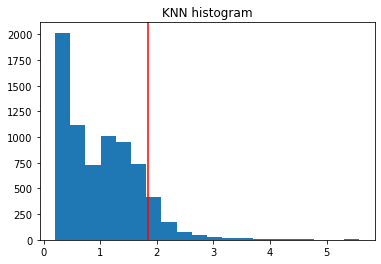

In [190]:
plt.hist(clf_KNN_2.decision_scores_, bins=20)
plt.axvline(np.min(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)]), c='r')
plt.title("KNN histogram")
plt.show()

## Top 1% outliers

In [191]:
outlier_knn_list_2 = []

for i in range(0,len(outlier_scores_knn_2)):
    outlier_knn_list_2.append((outlier_indexes_knn_2[i], outlier_scores_knn_2[i]))
    
outlier_knn_list_2[:10]

[(27, 2.163592732764061),
 (30, 2.3288177873905314),
 (31, 2.215780147248075),
 (66, 3.454028568955216),
 (67, 3.4452038359579205),
 (69, 2.103243144270923),
 (70, 5.378941181742243),
 (71, 5.157937658038123),
 (72, 3.342744002632402),
 (131, 2.0055191076448398)]

In [192]:
outlier_knn_list_2 = sorted(outlier_knn_list_2, key=outlier_score, reverse = True)

In [193]:
np.min(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

1.8464379704924807

In [194]:
np.max(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

5.574710030576074

In [195]:
outlier_knn_list_2[:10]

[(2451, 5.574710030576074),
 (3934, 5.441505064215438),
 (70, 5.378941181742243),
 (5137, 5.325816985975645),
 (71, 5.157937658038123),
 (3935, 4.993336508563046),
 (2440, 4.838073510416249),
 (1209, 4.735103977689538),
 (5143, 4.6710269928739505),
 (5142, 4.500489329088459)]

### Top 1%

In [196]:
top_outliers_knn_2 = outlier_knn_list_2[:top1perc]

In [197]:
indexes_list_knn_2 = [i[0] for i in top_outliers_knn_2] #retrieve index of outliers

In [198]:
df_knn_outliers_2 = df.iloc[indexes_list_knn_2]

In [199]:
df_knn_outliers_2

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
2451,-0.100786,-0.126211,0.359538,-0.092218,-0.149869,0.530467,-0.821282,0.194631,0.366140,-0.397308,...,-0.694358,-0.718708,-0.763534,0.203472,-0.809225,-0.809225,0.012626,-0.043034,-0.220034,6
3934,0.793422,0.916238,0.730133,0.761451,0.865956,0.681404,0.683437,0.088213,0.315619,-0.679553,...,-0.006612,0.732933,0.044442,0.858826,1.000000,1.000000,1.000000,-0.723711,0.228629,3
70,-0.599392,0.532506,0.004324,-0.664108,0.502260,0.048472,-0.717081,-0.182864,0.315453,0.022282,...,0.353106,-0.102020,-0.380786,0.440821,-0.608228,-0.608228,0.349807,0.508733,-0.496132,6
5137,-0.703402,0.672487,-0.464985,-0.704548,0.967664,-0.401827,-0.948813,-0.511096,-0.345057,0.358381,...,-0.614462,-0.785936,-0.921098,-0.102993,-0.944109,-0.944109,-0.431083,0.683948,-0.505728,6
71,-0.596410,0.024683,-0.160404,-0.631819,-0.068857,-0.235160,-0.866296,-0.249047,0.315453,0.022282,...,0.308823,0.105046,-0.224553,0.555555,-0.612611,-0.612611,0.327527,0.668284,-0.336641,6
3935,0.876942,0.729609,0.551648,0.852822,0.644811,0.542567,0.907994,0.409035,0.171438,-0.679553,...,0.172967,0.827784,0.212119,0.968985,0.866856,0.866856,0.904612,-0.708794,0.239055,3
2440,-0.060639,-0.306884,0.068578,-0.104270,-0.244592,0.147420,-0.835074,0.039751,0.276748,-0.702185,...,-0.533193,-0.665038,-0.656870,0.140824,-0.803391,-0.803391,0.076929,0.074088,-0.235313,6


In [200]:
#retrieve id of outliers
outliers_track_id_knn_2 = list(df_knn_outliers_2.index)
outliers_track_id_knn_2[:10]

[2451, 3934, 70, 5137, 71, 3935, 2440]

In [201]:
len(outliers_track_id_knn_2)

7

In [202]:
np.min(clf_KNN_2.decision_scores_[np.where(outliers_KNN_2==1)])

1.8464379704924807

In [203]:
top_outliers_knn_2[:5]

[(2451, 5.574710030576074),
 (3934, 5.441505064215438),
 (70, 5.378941181742243),
 (5137, 5.325816985975645),
 (71, 5.157937658038123)]

In [204]:
top_outliers_knn_track_id_2 = []

for i, val in top_outliers_knn_2:
    top_outliers_knn_track_id_2.append((df.iloc[i].name, val))

print("Track id with knn score of outlierness")
top_outliers_knn_track_id_2[:10]

Track id with knn score of outlierness


[(2451, 5.574710030576074),
 (3934, 5.441505064215438),
 (70, 5.378941181742243),
 (5137, 5.325816985975645),
 (71, 5.157937658038123),
 (3935, 4.993336508563046),
 (2440, 4.838073510416249)]

In [205]:
len(top_outliers_knn_track_id_2)

7

# Interctions of top 1%

In [206]:
set_LOF = set([i[0] for i in top_outliers_lof_id])
set_KNN = set([i[0] for i in top_outliers_knn_id])
set_ABOD = set([i[0] for i in top_outliers_ABOD_id]) #10
#set_ABOD2 = set([i[0] for i in top_outliers_ABOD_id_2]) #10

set_DBSCAN = set(outliers_dbscan)

In [207]:
sets = [set_LOF, set_KNN, set_ABOD,  set_DBSCAN] #set_ABOD2,

In [208]:
sets_names = ['LOF', 'KNN', 'ABOD',  'DBSCAN'] #'ABOD_10N',

In [209]:
tab_intersection_top_1perc_outliers = []
headers_outliers = ['Methods', 'Intersection']
print("Intersections of top 1%\n")

for i in range(0, len(sets)):
    for j in range(i+1, len(sets)):
        methods = ' - '.join(map(str, (sets_names[i], sets_names[j])))
        intersection = len(sets[i].intersection(sets[j]))
        print("{0:20} {1}".format(methods, intersection))
        if intersection != 0:
            tab_intersection_top_1perc_outliers.append((methods, intersection))

Intersections of top 1%

LOF - KNN            0
LOF - ABOD           0
LOF - DBSCAN         2
KNN - ABOD           3
KNN - DBSCAN         7
ABOD - DBSCAN        7


In [210]:
print(tabulate(tab_intersection_top_1perc_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='simple'))


Methods         Intersection
-------------  --------------
LOF - DBSCAN         2
KNN - ABOD           3
KNN - DBSCAN         7
ABOD - DBSCAN        7


In [211]:
print(tabulate(tab_intersection_top_1perc_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='latex'))


\begin{tabular}{lc}
\hline
 Methods       &  Intersection  \\
\hline
 LOF - DBSCAN  &       2        \\
 KNN - ABOD    &       3        \\
 KNN - DBSCAN  &       7        \\
 ABOD - DBSCAN &       7        \\
\hline
\end{tabular}


### Intersections of top 10

In [212]:
set_LOF_10 = set([i[0] for i in top_outliers_lof_id[:10]])
set_KNN_10 = set([i[0] for i in top_outliers_knn_id[:10]])
set_ABOD_10 = set([i[0] for i in top_outliers_ABOD_id[:10]])
#set_ABOD2_10 = set([i[0] for i in top_outliers_ABOD_id_2[:10]])

In [213]:
sets_10 = [set_LOF_10, set_KNN_10, set_ABOD_10 , set_DBSCAN] #set_ABOD2_10

In [214]:
sets_names_10 = [':10_LOF', ':10_KNN', ':10_ABOD', 
                 'DBSCAN']

In [215]:
tab_intersection_top_10_outliers = []
headers_outliers = ['Methods', 'Intersection']
print("Intersections of top 10\n")

for i in range(0, len(sets_10)):
    for j in range(i+1, len(sets_10)):
        methods = ' - '.join(map(str, (sets_names_10[i], sets_names_10[j])))
        intersection = len(sets_10[i].intersection(sets_10[j]))
        print("{0:35} {1}".format(methods, intersection))
        if intersection != 0:
            tab_intersection_top_10_outliers.append((methods, intersection))

Intersections of top 10

:10_LOF - :10_KNN                   0
:10_LOF - :10_ABOD                  0
:10_LOF - DBSCAN                    2
:10_KNN - :10_ABOD                  3
:10_KNN - DBSCAN                    7
:10_ABOD - DBSCAN                   7


In [216]:
print(tabulate(tab_intersection_top_10_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='simple'))


Methods              Intersection
------------------  --------------
:10_LOF - DBSCAN          2
:10_KNN - :10_ABOD        3
:10_KNN - DBSCAN          7
:10_ABOD - DBSCAN         7


In [217]:
print(tabulate(tab_intersection_top_10_outliers, headers_outliers, colalign=('left', 'center'), tablefmt='latex'))


\begin{tabular}{lc}
\hline
 Methods            &  Intersection  \\
\hline
 :10\_LOF - DBSCAN   &       2        \\
 :10\_KNN - :10\_ABOD &       3        \\
 :10\_KNN - DBSCAN   &       7        \\
 :10\_ABOD - DBSCAN  &       7        \\
\hline
\end{tabular}


### Numbers of outliers identified by each method

In [218]:
tab_outliers_count = []
headers_count = ['Methods', 'N. outliers']

tab_outliers_count.append(('LOF', list(outliers).count(-1)))
tab_outliers_count.append(('DBSCAN', list(best_dbscan_model.labels_).count(-1)))
tab_outliers_count.append(('KNN', list(outliers_KNN).count(1)))
tab_outliers_count.append(('ABOD', list(outliers_ABOD).count(1)))
#tab_outliers_count.append(('ABOD_10N', list(outliers_ABOD_2).count(1)))
tab_outliers_count.append(('ISO-FOR', list(outliers_if).count(-1)))

print(tabulate(tab_outliers_count, headers_count, colalign=('left', 'left'), tablefmt='simple'))

Methods    N. outliers
---------  -------------
LOF        168
DBSCAN     3692
KNN        726
ABOD       729
ISO-FOR    1026


## Selezione finale outliers

### Con indici

In [292]:

data_outliers = []
outlier_id_lists = [outlier_indexes,   outlier_indexes_if, outlier_indexes_knn, list(outliers_dbscan)] #outliers_dbscan


In [293]:
for index in range(0, len(df)):
    #el = df.iloc[index]
    count = 0
    for outliers_id in outlier_id_lists:
        if index in outliers_id:       
            count += 1
    #if index in outliers_dbscan:
        #count += 1
    if count >= 3:
        print(index, ':', count)
        data_outliers.append(index)


27 : 4
30 : 4
31 : 3
64 : 3
66 : 4
67 : 4
69 : 4
70 : 4
71 : 4
72 : 4
134 : 3
135 : 3
136 : 3
137 : 3
237 : 4
238 : 4
299 : 3
347 : 4
378 : 4
385 : 4
386 : 4
481 : 3
482 : 3
483 : 3
486 : 3
487 : 3
536 : 3
552 : 3
564 : 4
565 : 3
688 : 3
703 : 4
716 : 4
797 : 3
818 : 3
819 : 3
847 : 3
861 : 3
950 : 3
951 : 3
954 : 3
956 : 3
957 : 3
961 : 3
962 : 3
964 : 3
965 : 3
1049 : 3
1062 : 4
1107 : 3
1108 : 3
1109 : 3
1110 : 3
1111 : 3
1112 : 3
1113 : 3
1114 : 3
1115 : 3
1116 : 3
1117 : 3
1118 : 3
1119 : 3
1121 : 3
1122 : 3
1123 : 3
1125 : 3
1126 : 3
1127 : 3
1194 : 3
1209 : 4
1210 : 4
1223 : 3
1242 : 3
1243 : 3
1266 : 3
1267 : 3
1268 : 3
1269 : 3
1270 : 3
1271 : 3
1272 : 3
1273 : 3
1274 : 3
1275 : 3
1276 : 3
1277 : 3
1278 : 3
1279 : 3
1280 : 3
1281 : 3
1282 : 3
1283 : 3
1284 : 3
1285 : 3
1286 : 3
1287 : 3
1288 : 3
1289 : 3
1301 : 3
1302 : 3
1304 : 3
1308 : 3
1309 : 3
1311 : 3
1312 : 3
1343 : 4
1355 : 4
1369 : 4
1383 : 3
1401 : 3
1402 : 3
1403 : 3
1423 : 3
1424 : 3
1429 : 3
1432 : 3
1433 : 3
1434

### Analisi outliers

In [294]:
def print_out(method):
    for count, el in enumerate([ids for ids, score in method]):
        if el in outliers_dbscan:
            print(count, el,'yes')


In [295]:
len(data_outliers)

610

In [296]:
print_out(top_outliers_if_id)

0 5458 yes
1 3772 yes
2 3039 yes
3 2277 yes
4 5236 yes
5 1694 yes
6 5202 yes
7 1459 yes
8 6771 yes


In [297]:
print_out(top_outliers_lof_id)

0 2451 yes
1 71 yes


In [298]:
#print_out(top_outliers_ABOD_id_2)

In [299]:
print_out(top_outliers_if_id)

0 5458 yes
1 3772 yes
2 3039 yes
3 2277 yes
4 5236 yes
5 1694 yes
6 5202 yes
7 1459 yes
8 6771 yes


In [300]:
print_out(top_outliers_knn_id)

0 3934 yes
1 3935 yes
2 3939 yes
3 5137 yes
4 3936 yes
5 3938 yes
6 3764 yes


In [301]:
for count, el in enumerate(data_outliers):
    if el in outliers_dbscan:
        print(count, el,'yes')

0 27 yes
1 30 yes
2 31 yes
3 64 yes
4 66 yes
5 67 yes
6 69 yes
7 70 yes
8 71 yes
9 72 yes
10 134 yes
11 135 yes
12 136 yes
13 137 yes
14 237 yes
15 238 yes
16 299 yes
17 347 yes
18 378 yes
19 385 yes
20 386 yes
21 481 yes
22 482 yes
23 483 yes
24 486 yes
25 487 yes
26 536 yes
27 552 yes
28 564 yes
29 565 yes
30 688 yes
31 703 yes
32 716 yes
33 797 yes
34 818 yes
35 819 yes
36 847 yes
37 861 yes
38 950 yes
39 951 yes
40 954 yes
41 956 yes
42 957 yes
43 961 yes
44 962 yes
45 964 yes
46 965 yes
47 1049 yes
48 1062 yes
49 1107 yes
50 1108 yes
51 1109 yes
52 1110 yes
53 1111 yes
54 1112 yes
55 1113 yes
56 1114 yes
57 1115 yes
58 1116 yes
59 1117 yes
60 1118 yes
61 1119 yes
62 1121 yes
63 1122 yes
64 1123 yes
65 1125 yes
66 1126 yes
67 1127 yes
68 1194 yes
69 1209 yes
70 1210 yes
71 1223 yes
72 1242 yes
73 1243 yes
74 1266 yes
75 1267 yes
76 1268 yes
77 1269 yes
78 1270 yes
79 1271 yes
80 1272 yes
81 1273 yes
82 1274 yes
83 1275 yes
84 1276 yes
85 1277 yes
86 1278 yes
87 1279 yes
88 1280 yes

In [302]:
len(data_outliers)

610

### Eliminazione outliers

In [303]:
df_outliers_final = df.iloc[data_outliers]
df_outliers_final.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,Activity
27,-0.904300,-0.181937,-0.443151,-0.901100,-0.110813,-0.400599,-0.931896,0.042099,-0.336526,0.716476,...,-0.965328,-0.975070,-0.962917,-0.540489,-0.983317,-0.983317,-0.795886,-0.667085,0.054216,4
30,-0.814708,-0.749418,-0.571899,-0.878682,-0.776895,-0.700710,-0.737152,-0.318402,-0.473334,0.503461,...,-0.407719,-0.604335,-0.760213,0.120497,-0.870864,-0.870864,-0.181838,-0.582806,-0.020756,4
31,-0.758393,-0.586537,-0.439110,-0.774118,-0.555350,-0.438736,-0.737152,-0.212994,-0.473334,0.503461,...,-0.451397,-0.651631,-0.704135,0.202837,-0.872384,-0.872384,-0.187722,-0.552939,-0.053539,4
64,-0.661294,-0.713353,-0.701155,-0.693948,-0.706558,-0.755422,-0.891284,-0.373852,-0.451279,0.251271,...,-0.809650,-0.877859,-0.934724,-0.190153,-0.931882,-0.931882,-0.400606,0.205759,-0.536104,6
66,-0.633135,-0.189775,-0.319336,-0.623804,-0.199675,-0.281088,-0.925208,-0.241482,-0.120985,0.263374,...,-0.158148,-0.449813,-0.510478,0.286582,-0.766726,-0.766726,0.145927,0.272083,-0.534122,6


In [304]:
df_outliers_final.shape

(610, 201)

In [305]:
df_final = df.drop(data_outliers)
df_final.shape

(6742, 201)

In [306]:
df.shape

(7352, 201)

In [307]:
df_final.to_csv('../data/reduced_cleaned_files/train_reduced_cleaned_UFS.csv', index=False)

In [308]:
df_cleaned = pd.read_csv('../data/reduced_cleaned_files/train_reduced_cleaned.csv')
X_train = df_cleaned.drop(['Activity'], axis=1)

y_train = pd.DataFrame(df_cleaned['Activity'])


In [286]:
X_train.shape

(6742, 200)

In [287]:
y_train.head()

,Activity
0,5
1,5
2,5
3,5
4,5


In [288]:
type(y_train)

pandas.core.frame.DataFrame

In [282]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [291]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

NameError: name 'X_test' is not defined